In [ ]:
from tqdm import tqdm_notebook as tqdm
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

In [ ]:
"""load gauge values"""
path = "rainfall-monthly-total/rainfall-monthly-total.csv"
df_monthly = pd.read_csv(path)

df_monthly['year'] = df_monthly["month"].apply(lambda x : int(str(x)[:-3]))
df_monthly['month'] = df_monthly["month"].apply(lambda x : int(str(x)[5:]))

df_monthly = df_monthly.loc[df_monthly["year"] == 2017]
df_monthly = df_monthly.reset_index(drop=True)
df_monthly = df_monthly[['month', 'year', 'total_rainfall']]
df_monthly.head()

In [ ]:
num_month = [0,5,4,4,4,5,4,5,4,4,5,4,4]
num = np.array(num_month)
month_num = np.cumsum(num)

mth_to_wk = dict()
for a in range(1,13):
    mth_to_wk[a] = range(month_num[a-1], month_num[a])
# mth_to_wk

In [ ]:
wk_to_mth = dict()
for a in mth_to_wk:
    for w in mth_to_wk[a]:
        wk_to_mth[w+1] = a
# wk_to_mth

# SG Data

In [41]:
df_sg = pd.read_csv("data_singapore_only.csv")
del df_sg['Unnamed: 0']

df_sg = df_sg.sort_values(by='week', ascending=True)
df_sg = df_sg.reset_index(drop=True)
df_sg.head()

,lat,long,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,week,ave
0,1.4758,103.6033,1928,2,0,7,5,7,13,8,...,1,0,1,0,0,2,0,0,13,0.426587
1,1.2893,103.7766,1907,4,1,9,10,3,13,2,...,0,0,0,0,0,0,0,0,13,0.493056
2,1.2893,103.7740,1912,5,3,7,8,6,9,7,...,0,0,0,0,0,0,0,0,13,0.464286
3,1.2893,103.7714,1922,8,4,3,8,7,6,5,...,0,0,0,0,0,0,0,0,13,0.412202
4,1.2893,103.7688,1926,4,1,4,1,5,4,15,...,0,0,0,0,0,0,0,0,13,0.427083


In [44]:
"""get necessary values"""
df_sg = df_sg[['lat','long','week','ave']]
df_sg.head()

,lat,long,week,ave
0,1.4758,103.6033,13,0.426587
1,1.2893,103.7766,13,0.493056
2,1.2893,103.7740,13,0.464286
3,1.2893,103.7714,13,0.412202
4,1.2893,103.7688,13,0.427083


In [45]:
df_sg["month"] = df_sg["week"].apply(lambda x : wk_to_mth[x])
df_sg.head()

,lat,long,week,ave,month
0,1.4758,103.6033,13,0.426587,3
1,1.2893,103.7766,13,0.493056,3
2,1.2893,103.7740,13,0.464286,3
3,1.2893,103.7714,13,0.412202,3
4,1.2893,103.7688,13,0.427083,3


In [ ]:
month_total = [0.,0.]
for m in df_sg['month'].unique():
    month_total.append( df_sg[df_sg['month']==m]['ave'].mean() )
# month_total

In [ ]:
df_monthly['radar'] = month_total
df_monthly['radar'] = df_monthly['radar']
# df_monthly

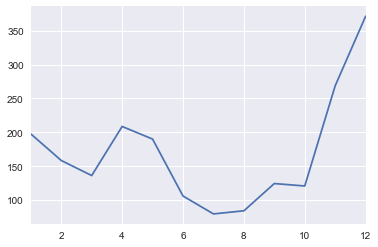

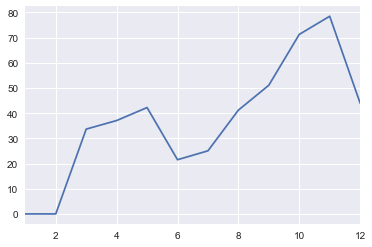

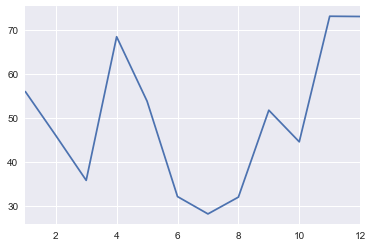

In [99]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)

data = df_monthly

for a in data.columns.values[2:]:
    plt.figure()
    sns.tsplot(data=data[a], time=range(1,13))
    plt.savefig(a+"_.png")
    plt.show()

# Gauge Data

In [ ]:
"""load gauge values"""
path = "datasets/gauge.csv"
df_gauge = pd.read_csv(path)
df_gauge["Month"] = df_gauge["Week"].apply(lambda x : wk_to_mth[x])
df_gauge.head()

In [ ]:
month_total = []
for m in df_gauge['Month'].unique():
    test = df_gauge[df_gauge['Month']==m].mean(axis=0)
    month_total.append(test[2:52].mean())
# month_total

In [98]:
df_monthly['gauge'] = month_total
df_monthly

,month,year,total_rainfall,radar,gauge
0,1,2017,197.6,0.000000,55.9460
1,2,2017,158.4,0.000000,46.0005
2,3,2017,136.2,33.671878,35.8250
3,4,2017,208.6,37.076782,68.3715
4,5,2017,190.0,42.229897,53.7652
5,6,2017,106.0,21.518708,32.1465
6,7,2017,79.6,25.051481,28.2172
7,8,2017,84.2,41.203898,32.0215
8,9,2017,124.4,51.092644,51.7185
9,10,2017,120.8,71.270095,44.5604


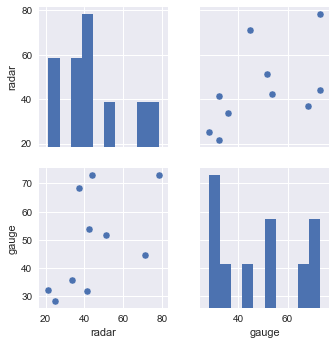

In [103]:
sns.pairplot(df_monthly[['radar', 'gauge']][2:])

# Correlation of each data point to rainfall

In [ ]:
import os
filepath = './datasets'
radar_path = filepath+'/radar'

In [ ]:
"""count mean bin per week"""
df_result = pd.DataFrame()
train_week = []
for filename in tqdm(os.listdir(radar_path)):
    week = filename.split('.')[0][-2:]
    train_week.append(str(week))
    full_radar_path = os.path.join(radar_path, filename)
    df_radar = pd.read_csv(full_radar_path)
    radar_obs = df_radar.values[:,2:]
    radar_arange = np.arange(0, 34)
    radar_mean = np.matmul(radar_obs, radar_arange) / 2016.
    if 'latlong' not in df_result.columns:
        df_result['latlong'] = df_radar['lat'] * 1000 + df_radar['long']
    df_result[week] = radar_mean

In [ ]:
"""count mean week to month"""

for m in mth_to_wk:
    col_n = []
    print "m", m
    for w in df_result.columns[1:31]:
        if int(w) in mth_to_wk[m]:
            print w
            col_n.append(str(w))
    df_result["month_"+str(m)] = df_result[col_n].mean(axis=1)

In [5]:
df_result.head()

,latlong,13,15,16,17,18,19,20,21,22,...,39,41,44,45,46,47,48,49,50,51
0,0,0.675099,0.382937,0.535714,0.815476,0.248016,0.237599,0.416667,0.908730,0.306052,...,0.193948,0.994544,0.695933,1.006944,1.025298,0.670139,0.461310,0.645337,0.406250,0.157242
1,1,0.714782,0.382440,0.493552,0.841270,0.258433,0.266369,0.450397,0.963790,0.289187,...,0.164683,0.980655,0.738591,1.010417,1.021825,0.635913,0.457341,0.637897,0.339782,0.183532
2,2,0.742063,0.411706,0.519345,0.859127,0.235615,0.260417,0.466270,0.968254,0.324901,...,0.145833,0.958333,0.691468,1.002480,1.012897,0.616071,0.469742,0.611607,0.336806,0.154266
3,3,0.746032,0.380456,0.522321,0.887897,0.247520,0.278274,0.474702,0.954365,0.307540,...,0.157738,0.932044,0.755952,1.075893,1.037202,0.561012,0.494048,0.574405,0.350694,0.157242
4,4,0.745536,0.380456,0.519345,0.860119,0.248016,0.277778,0.472222,0.950893,0.304563,...,0.155258,0.923115,0.771825,1.070933,1.038690,0.553075,0.499008,0.573909,0.352183,0.154266


In [22]:
df_gauge_res = pd.DataFrame()
for i in range(1,13):
    res=df_gauge[df_gauge.columns[2:-1]].loc[df_gauge["Month"] == i].mean(axis=0)
    df_gauge_res[i] = res
df_gauge_res['gauge_num']=df_gauge_res.index
df_gauge_res.head()

,1,2,3,4,5,6,7,8,9,10,11,12,gauge_num
0,78.08,50.55,25.550,64.550,49.72,19.95,27.08,26.90,41.000,46.36,90.90,74.85,0
1,53.28,28.60,21.050,83.250,56.52,38.90,29.96,57.70,76.750,40.64,40.85,46.75,1
2,51.60,37.25,27.600,67.700,46.40,16.80,24.88,24.45,36.850,31.52,62.25,53.95,2
3,49.24,51.10,29.550,51.200,50.72,16.65,13.68,20.15,35.900,18.00,91.10,87.95,3
4,94.98,44.85,47.175,69.325,63.42,28.45,34.82,30.25,35.175,41.98,82.15,90.35,4


In [ ]:
"""get extensive correlation value per coord and per gauge"""
df_latlong_corr_res = pd.DataFrame()
df_latlong_corr_res['latlong'] = df_result.index

df_gauge_corr_res = pd.DataFrame()
df_gauge_corr_res['gauge_num'] = df_gauge_res['gauge_num'].values

rainfall_values = df_monthly['total_rainfall']
total_latlong = []
for idx, latlong in tqdm(df_result.iterrows()):
    latlong_values = latlong.values[-9:]
    correlation = np.corrcoef(rainfall_values[3:].tolist(), latlong_values.tolist())[0][1]
    total_latlong.append(correlation)
df_latlong_corr_res['corr_latlong_rainfall'] = total_latlong

total_gauge = []
for idx, gauge in tqdm(df_gauge_res.iterrows()):
    gauge_values = gauge.values[:-1]
    correlation = np.corrcoef(rainfall_values.tolist(), gauge_values.tolist())[0][1]
    total_gauge.append(correlation)
df_gauge_corr_res['corr_gauge_rainfall'] = total_gauge

In [29]:
df_latlong_corr_res.head()

,latlong,corr_latlong_rainfall
0,0,0.372373
1,1,0.350226
2,2,0.366841
3,3,0.375966
4,4,0.379612


In [30]:
df_gauge_corr_res.head()

,gauge_num,corr_gauge_rainfall
0,0,0.823149
1,1,0.131346
2,2,0.779774
3,3,0.934711
4,4,0.863271
